In [12]:
import imageio.v3 as iio
import numpy as np
from pathlib import Path
import os
from satisfying_sims.themes.collision_effect import _chroma_key_green_to_rgba

In [13]:
project_root = Path(os.getcwd()).parent
asset_dir = project_root / "assets" / "effects"
name = "firework.mp4"
video_path = asset_dir / name

In [14]:
frames = []
for frame in iio.imiter(video_path):
    # frame is (H, W, 3) uint8 RGB
    frames.append(frame)

frames = np.stack(frames)  # (T, H, W, 3)
print(frames.shape, frames.dtype)


(24, 1080, 1920, 3) uint8


(np.float64(-0.5), np.float64(1919.5), np.float64(1079.5), np.float64(-0.5))

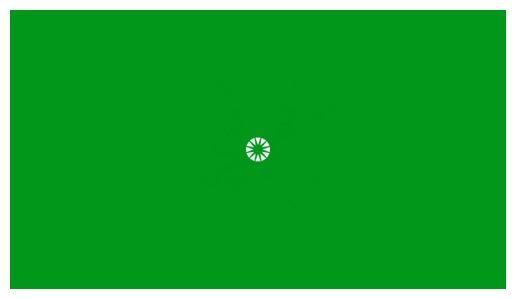

In [18]:
import matplotlib.pyplot as plt
i = 4

plt.imshow(frames[i])
plt.axis("off")


green mean: [  0. 151.  27.]
green sd: [0. 0. 0.]
[[   0    1    2 ... 1917 1918 1919]
 [   0    1    2 ... 1917 1918 1919]
 [   0    1    2 ... 1917 1918 1919]
 ...
 [   0    1    2 ... 1917 1918 1919]
 [   0    1    2 ... 1917 1918 1919]
 [   0    1    2 ... 1917 1918 1919]] [[   0    0    0 ...    0    0    0]
 [   1    1    1 ...    1    1    1]
 [   2    2    2 ...    2    2    2]
 ...
 [1077 1077 1077 ... 1077 1077 1077]
 [1078 1078 1078 ... 1078 1078 1078]
 [1079 1079 1079 ... 1079 1079 1079]]
(24, 683, 695, 3)


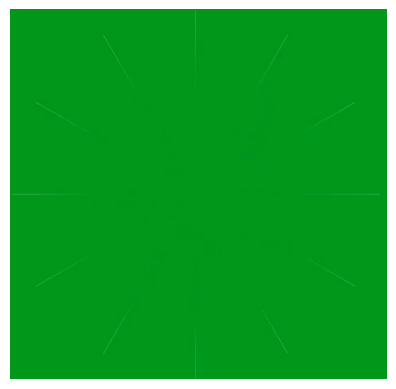

In [20]:

green_screen = frames[12, :100, :100, :]
plt.imshow(green_screen)
plt.axis("off")
green_mean = np.mean(green_screen, axis=(0, 1))
green_sd = np.std(green_screen, axis=(0, 1))
print("green mean:", green_mean)
print("green sd:", green_sd)
np.sum(np.all(frames[12] == green_mean[None, None, :], axis=-1))
can_mask = np.all(frames==green_mean[None, None, None, :], axis=(0, 3))
X, Y = np.meshgrid(np.arange(frames.shape[2]), np.arange(frames.shape[1]))
print(X, Y)
right = np.max(X[~can_mask])
left = np.min(X[~can_mask])
top = np.min(Y[~can_mask])
bottom = np.max(Y[~can_mask])
cropped_frames = frames[:, top:bottom, left:right, :]
print(cropped_frames.shape)
plt.imshow(cropped_frames[18])
plt.axis("off")
np.savez_compressed(
    str(asset_dir / Path(name).stem) + '.npz',
    frames=cropped_frames[i:]
)


In [7]:
brightness = np.sum(frames, axis=-1)/3
print(brightness.shape)
idx = np.unravel_index(np.argmax(brightness), brightness.shape)
print(idx)
print(frames[*idx, :])


(24, 1080, 1920)
(np.int64(1), np.int64(535), np.int64(956))
[255 255 255]


In [8]:
# this doesn't work
i=12
frame = frames[i]/255.0
background = frame[0, 0, :]
if frame.shape[-1] ==3:
    frame = np.concatenate((frame, np.full(frame.shape[:2]+(1,), 1.0)), axis=-1)

background_mask = np.all(np.abs(frame[:, :, :3] - background) < 1e-6, axis=-1)
frame[background_mask, :] = np.array([0,0,0,0]) 

(np.float64(-0.5), np.float64(1919.5), np.float64(1079.5), np.float64(-0.5))

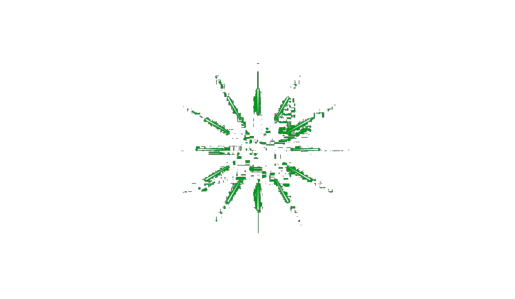

In [9]:
plt.imshow(frame)
plt.axis("off")

In [10]:
i = 12
frame = frames[i]
out = _chroma_key_green_to_rgba(
    frame,
    white=True,
    white_mode="alpha"
)

(np.float64(-0.5), np.float64(1919.5), np.float64(1079.5), np.float64(-0.5))

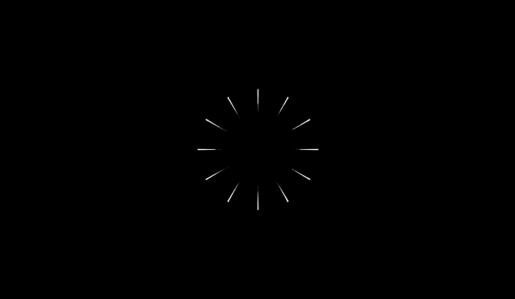

In [11]:
fig = plt.figure()
fig.patch.set_facecolor((0, 0, 0, 1))
plt.imshow(out)
plt.axis("off")

(np.float64(-0.5), np.float64(99.5), np.float64(99.5), np.float64(-0.5))

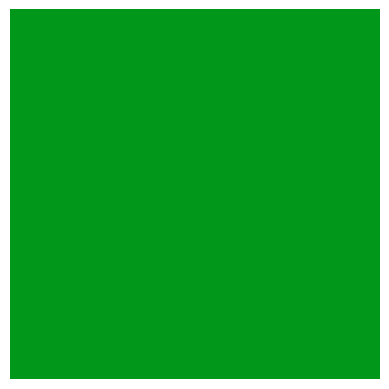

In [7]:
green_screen = frames[12, :100, :100, :]
plt.imshow(green_screen)
plt.axis("off")

In [8]:
green_mean = np.mean(green_screen, axis=(0, 1))
green_sd = np.std(green_screen, axis=(0, 1))
print("green mean:", green_mean)
print("green sd:", green_sd)

green mean: [  0. 151.  27.]
green sd: [0. 0. 0.]


In [9]:
np.sum(np.all(frames[12] == green_mean[None, None, :], axis=-1))

np.int64(2034206)

In [12]:
can_mask = np.all(frames==green_mean[None, None, None, :], axis=(0, 3))

In [13]:
X, Y = np.meshgrid(np.arange(frames.shape[2]), np.arange(frames.shape[1]))
print(X, Y)

[[   0    1    2 ... 1917 1918 1919]
 [   0    1    2 ... 1917 1918 1919]
 [   0    1    2 ... 1917 1918 1919]
 ...
 [   0    1    2 ... 1917 1918 1919]
 [   0    1    2 ... 1917 1918 1919]
 [   0    1    2 ... 1917 1918 1919]] [[   0    0    0 ...    0    0    0]
 [   1    1    1 ...    1    1    1]
 [   2    2    2 ...    2    2    2]
 ...
 [1077 1077 1077 ... 1077 1077 1077]
 [1078 1078 1078 ... 1078 1078 1078]
 [1079 1079 1079 ... 1079 1079 1079]]


In [14]:
right = np.max(X[~can_mask])
left = np.min(X[~can_mask])
top = np.min(Y[~can_mask])
bottom = np.max(Y[~can_mask])
cropped_frames = frames[:, top:bottom, left:right, :]
print(cropped_frames.shape)

(24, 683, 695, 3)


(np.float64(-0.5), np.float64(694.5), np.float64(682.5), np.float64(-0.5))

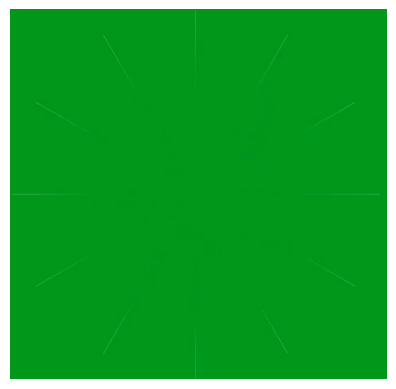

In [17]:
plt.imshow(cropped_frames[18])
plt.axis("off")

In [ ]:
np.savez_compressed(
    asset_dir / Path(name).stem + '.npz',
    frames=cropped_frames
)
